# Equilibrium *vs* fractional crystallization
In the preceeding chapter, we have created a magma ocean whose bottom is defined by the crossing point of the adiabat and an iso-melt fraction line corresponding to the RCMF. The underlying assumption to this is tht forming crystals remain in suspension in the magma ocean, so that you can simply infer the melt fraction from the local temperature. However, there is another possible scenario: if the forming crystals settle at the bottom of the magma ocean and form a compact cumulates pile. These to view are referred to as "equilibrium" and "fractional" crystallization (this is originally geochimical vocabulary), and are represented in the figure below:

![title](sketch_crystallization.png)

## Equilibrium crystallization
The base class for magma ocean implement equilibrium crystallization. Let's load the "better" magma ocean from last chapter:

In [6]:
from MO_lib.eq_basic import MO as MO_equi

## Fractional crystallization
The fractional crystallization case is implemented as a sub-class of magma_ocean, which is called ... fractional_crystallization. It shares most of the methods and attributes from the parent class that implements equilibrium crystallization, except a few things specific to the fractional crystallization case.

In [8]:
from magma_ocean import fractional_crystallization
from physics.constants import Earth_gravity,Earth_surface_radius
from physics.eos import eos_book

# Define magma ocean
MO_frac = fractional_crystallization(MO_equi.adiabat.T_pot,
                                     MO_equi.p_CMB,
                                     eos={'rho':eos_book['rho']['MK19l'],'alpha':eos_book['alpha']['N19'],'cp':eos_book['cp']['cst']},
                                     g=MO_equi.gravity,
                                     R=MO_equi.R_out)

# Add melting curves
from physics.phase_change.refractories import mc_book
mc = mc_book['Earth'] # melting curves from Fiquet et al., 2010
MO_frac.setMeltingCurves(mc)

No file provided: calculating lookups, be patient!


In order to visualize the difference, we can plot the $p$-$T$ temperature of the bottom of the magma ocean throughout crystallization

In [16]:
MO_equi.setParametrization('T_bot',lambda var:var['MO'].adiabat.getT(var['p_bot']),['p_bot','MO'],is_profile=False)
MO_frac.setParametrization('T_bot',lambda var:var['MO'].adiabat.getT(var['p_bot']),['p_bot','MO'],is_profile=False)

from tools import time_series
ts_equi = time_series(MO_equi)
ts_frac = time_series(MO_frac)

from numpy import linspace
for T_pot in linspace(mc_book['Earth'].getTsol(0),3000):
    MO_equi.updateT_pot(T_pot)
    MO_frac.updateT_pot(T_pot)
    ts_equi.write(0)
    ts_frac.write(0)

(135.0, 0.0)

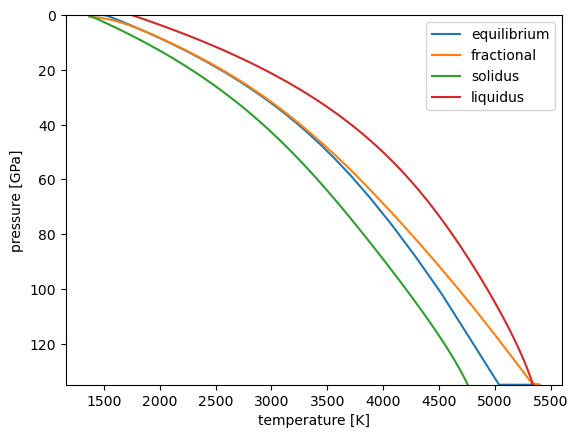

In [22]:
import matplotlib.pyplot as plt

plt.plot(ts_equi('T_bot'),ts_equi('p_bot')*1e-9,label='equilibrium')
plt.plot(ts_frac('T_bot'),ts_frac('p_bot')*1e-9,label='fractional')
mc_book['Earth'].plot()
plt.legend()
plt.xlabel('temperature [K]')
plt.ylabel('pressure [GPa]')
plt.ylim(135,0)

We see that the equilibrium crystallization case (blue curve) sticks to the RCMF, while in the fractional crystallization case, the cumulates pile starts to grow as soon as some of the adiabat drops below the liquidus (i.e. as soon as crystals form and settle). It also continues further: the surface temperature at which the equilibrium crystallizatoin magma ocean vanishes is the surface temperature of the RCMF, for the fractional crystallizatoin case, it is the solidus.